# 1.0장 중간 프로젝트 설명

## tsf 파일 처리법

In [57]:
import pandas as pd
from aeon.datasets import load_from_tsf_file #numpy 버전을 aeon에 맞춰 설치하여야 함: 2.0.0 이하, 최초 가상환경 설정 시 pip install aeon으로 해결 가능 혹은 pip install numpy=2.0.0
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

df = load_from_tsf_file('data/australian_electricity_demand_dataset.tsf')
df

(  series_name state start_timestamp  \
 0          T1   NSW      2002-01-01   
 1          T2   VIC      2002-01-01   
 2          T3   QUN      2002-01-01   
 3          T4    SA      2002-01-01   
 4          T5   TAS      2002-01-01   
 
                                         series_value  
 0  [5714.045004, 5360.189078, 5014.835118, 4602.7...  
 1  [3535.867064, 3383.499028, 3655.527552, 3510.4...  
 2  [3382.041342, 3288.315794, 3172.329022, 3020.3...  
 3  [1191.078014, 1219.589472, 1119.173498, 1016.4...  
 4  [315.915504, 306.245864, 305.762576, 295.60219...  ,
 {'frequency': 'half_hourly',
  'forecast_horizon': None,
  'contain_missing_values': False,
  'contain_equal_length': False})

In [26]:
# 시계열들이 저장되어 있는 부분
df[0]

,series_name,state,start_timestamp,series_value
0,T1,NSW,2002-01-01,"[5714.045004, 5360.189078, 5014.835118, 4602.7..."
1,T2,VIC,2002-01-01,"[3535.867064, 3383.499028, 3655.527552, 3510.4..."
2,T3,QUN,2002-01-01,"[3382.041342, 3288.315794, 3172.329022, 3020.3..."
3,T4,SA,2002-01-01,"[1191.078014, 1219.589472, 1119.173498, 1016.4..."
4,T5,TAS,2002-01-01,"[315.915504, 306.245864, 305.762576, 295.60219..."


In [27]:
# 시계열들의 주요 정보들이 저장되어 있는 부분
df[1]

{'frequency': 'half_hourly',
 'forecast_horizon': None,
 'contain_missing_values': False,
 'contain_equal_length': False}

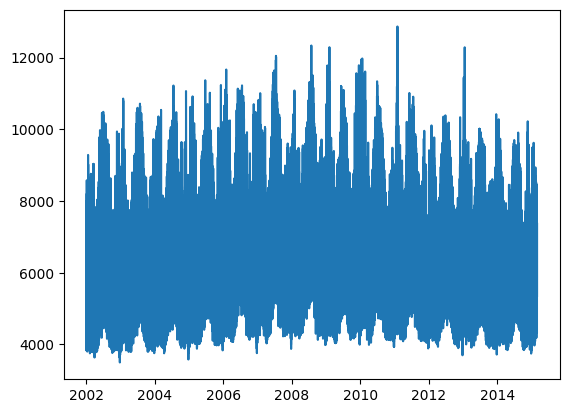

In [45]:
ts = pd.Series(df[0]['series_value'][0], pd.date_range(df[0]['start_timestamp'][0], periods=len(df[0]['series_value'][0]), freq='0.5h'))

plt.plot(ts)
plt.show()

C:\Users\YJPark\AppData\Local\Temp\ipykernel_46228\903380440.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ts.resample('M').sum()


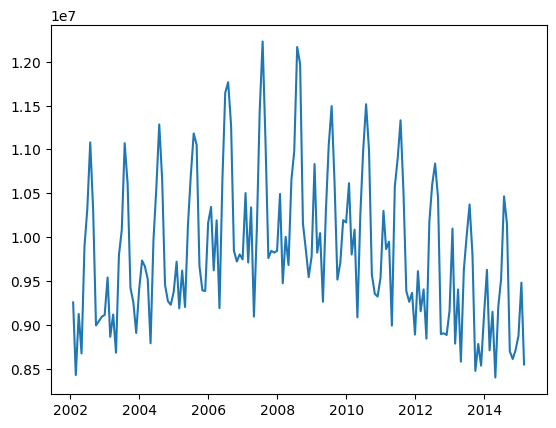

In [46]:
ts = ts.resample('M').sum()

plt.plot(ts)
plt.show()

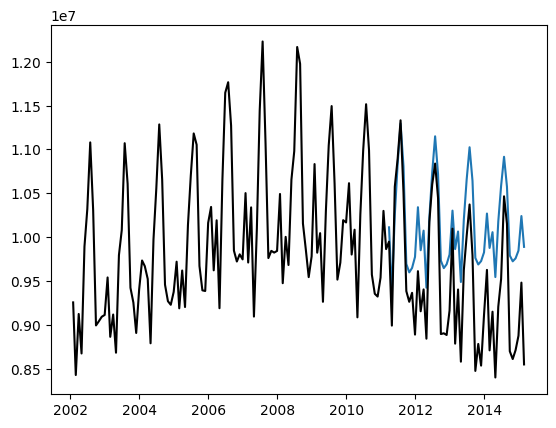

In [55]:
train = ts[:int(len(ts)*0.7)]
test = ts[int(len(ts)*0.7):]

fit = ARIMA(train, order=(1, 0, 1), seasonal_order=(2, 0, 2, 12)).fit()
forecast = fit.get_forecast(len(test)).predicted_mean

plt.plot(forecast)
plt.plot(ts, color='black')
plt.show()

In [58]:
print(f"MSE: {mean_squared_error(test.values, forecast.values)} MAE: {mean_absolute_error(test.values, forecast.values)} MAPE: {mean_absolute_percentage_error(test.values, forecast.values)}")

MSE: 578330640534.0442 MAE: 673399.9778890964 MAPE: 0.0740018382776072
